In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tags = pd.read_csv("tags.csv")
movies = pd.read_csv("movies.csv")
links = pd.read_csv("links.csv")
ratings =pd.read_csv("ratings.csv")

In [3]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [4]:
movies.shape

(9742, 3)

In [5]:
ratings.shape

(100836, 4)

In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
ratings.userId.nunique()

610

merging "ratings" dataset with "movies" dataset on the common column "movieId" as the the "movies" dataset has the column "title" of the movie and that is essential to match the movie with the highest ratings. 

In [8]:
movie_ratings = pd.merge(movies,ratings, on='movieId', how ='inner')
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [9]:
movie_ratings.head(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


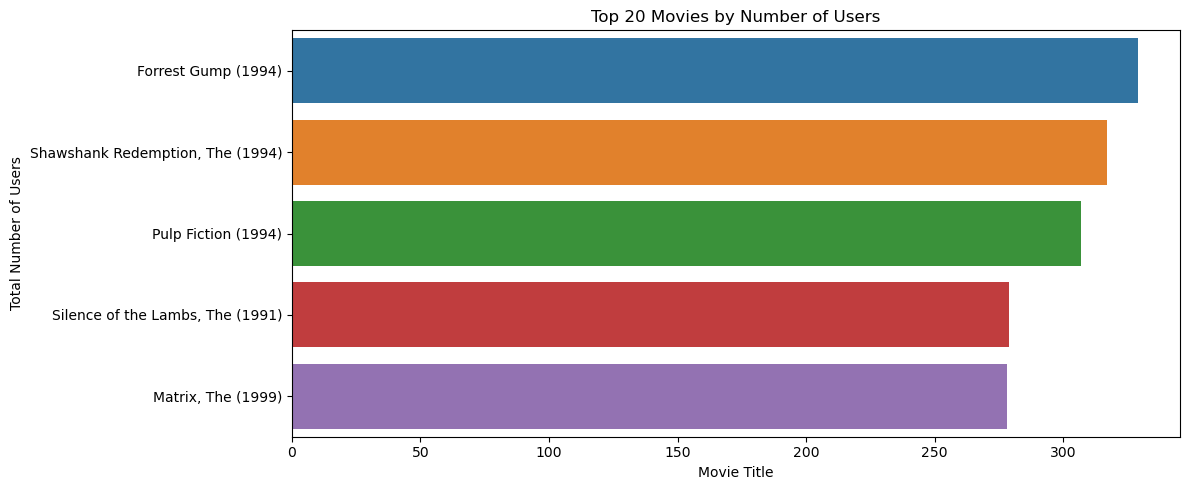

In [10]:
user_counts = movie_ratings.groupby(['movieId','title'])['userId'].nunique().reset_index()
user_counts.columns= ['movieId', 'title', 'total_users']
plt.figure(figsize=(12,5))
sns.barplot(data =user_counts.sort_values(by='total_users', ascending=False).head(5), 
            y='title', x='total_users')
plt.title('Top 20 Movies by Number of Users')
plt.xlabel('Movie Title')
plt.ylabel('Total Number of Users')

plt.tight_layout()
plt.show()

In [11]:
tags.head(5)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [12]:
movie_tag = pd.merge(movies,tags, on= 'movieId', how='inner')
movie_tag.head(2)

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825


In [13]:
Matrix_tags = movie_tag[movie_tag['title']=='Matrix, The (1999)']
taglist = Matrix_tags['tag'].unique()
print(taglist)

['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [14]:
"Terminator 2: Judgment Day (1991)"
avg_rating_term = movie_ratings[movie_ratings['title']=="Terminator 2: Judgment Day (1991)"]
average_rating = avg_rating_term['rating'].mean()
print(average_rating)                             

3.970982142857143


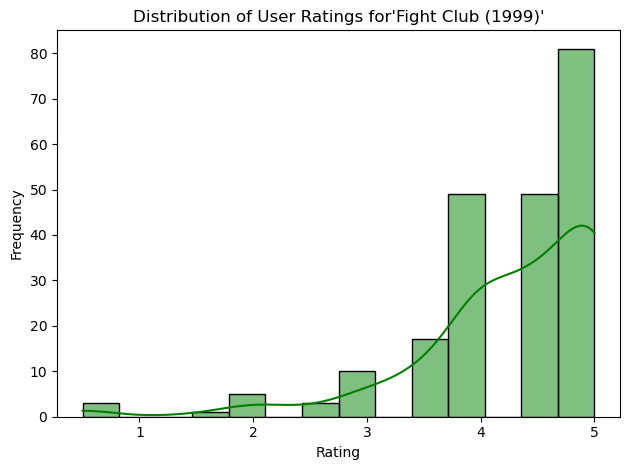

In [15]:
movie_title = movie_ratings[movie_ratings['title']== 'Fight Club (1999)']
sns.histplot(movie_title['rating'], kde =True, color ='green')

plt.title("Distribution of User Ratings for'Fight Club (1999)'")
plt.xlabel("Rating")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show();

#### Mandatory Operations

In [16]:
agg_func = movie_ratings.groupby('movieId')['rating'].agg(['count','mean']).reset_index()
agg_func.columns = ['movieId', 'Count_of_Ratings', 'Average_ratings']
agg_func.head()

,movieId,Count_of_Ratings,Average_ratings
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429


In [17]:
md_1= pd.merge(movie_ratings, agg_func, on = 'movieId', how ='inner')
md_1.head()

,movieId,title,genres,userId,rating,timestamp,Count_of_Ratings,Average_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,215,3.92093
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,215,3.92093
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,215,3.92093
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,215,3.92093
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,215,3.92093


In [18]:
md_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   movieId           100836 non-null  int64  
 1   title             100836 non-null  object 
 2   genres            100836 non-null  object 
 3   userId            100836 non-null  int64  
 4   rating            100836 non-null  float64
 5   timestamp         100836 non-null  int64  
 6   Count_of_Ratings  100836 non-null  int64  
 7   Average_ratings   100836 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 6.2+ MB


In [19]:
md_1filter = md_1[md_1['Count_of_Ratings']> 50]
md_1filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40660 entries, 0 to 98314
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movieId           40660 non-null  int64  
 1   title             40660 non-null  object 
 2   genres            40660 non-null  object 
 3   userId            40660 non-null  int64  
 4   rating            40660 non-null  float64
 5   timestamp         40660 non-null  int64  
 6   Count_of_Ratings  40660 non-null  int64  
 7   Average_ratings   40660 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 2.8+ MB


In [20]:
md_1filter.head(2)

,movieId,title,genres,userId,rating,timestamp,Count_of_Ratings,Average_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,215,3.92093
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,215,3.92093


In [21]:
avg_rating= md_1filter.groupby(['movieId','title'])['rating'].mean().reset_index()
avg_rating.head()

,movieId,title,rating
0,1,Toy Story (1995),3.920930
1,2,Jumanji (1995),3.431818
2,3,Grumpier Old Men (1995),3.259615
3,6,Heat (1995),3.946078
4,7,Sabrina (1995),3.185185


In [22]:
max_avg_index = avg_rating['rating'].idxmax()
popular = avg_rating.loc[max_avg_index]
print(f"The most popular movie based on average user ratings is:")
print(f"Title: {popular['title']}")
print(f"Average Rating: {popular['rating']:.2f}") 

The most popular movie based on average user ratings is:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.43


In [23]:
sum_ratings =md_1filter.groupby(['movieId', 'title'])['Count_of_Ratings'].sum().reset_index()
top_5= sum_ratings.sort_values(by='Count_of_Ratings', ascending=False)
top_5.head(5)

,movieId,title,Count_of_Ratings
61,356,Forrest Gump (1994),108241
53,318,"Shawshank Redemption, The (1994)",100489
49,296,Pulp Fiction (1994),94249
99,593,"Silence of the Lambs, The (1991)",77841
248,2571,"Matrix, The (1999)",77284


In [24]:
scifi_movies = md_1filter[md_1filter['genres'].str.contains('Sci-Fi')]
sum_scifi_ratings = scifi_movies.groupby(['movieId', 'title', 'genres'])['Count_of_Ratings'].sum().reset_index()
sorted_scifi_ratings = sum_scifi_ratings.sort_values(by='Count_of_Ratings', ascending=False)
sorted_scifi_ratings.head()

,movieId,title,genres,Count_of_Ratings
43,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,77284
5,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,63001
11,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,56644
13,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,50176
20,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,44521


In [25]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [26]:
movie_links_merge = pd.merge(links, md_1filter, on = 'movieId', how ='inner')
movie_links= movie_links_merge[movie_links_merge['Count_of_Ratings']> 50]
movie_links.head()

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,Count_of_Ratings,Average_ratings
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,215,3.92093
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,215,3.92093
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,215,3.92093
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,215,3.92093
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,215,3.92093


In [27]:
movie_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40660 entries, 0 to 40659
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movieId           40660 non-null  int64  
 1   imdbId            40660 non-null  int64  
 2   tmdbId            40660 non-null  float64
 3   title             40660 non-null  object 
 4   genres            40660 non-null  object 
 5   userId            40660 non-null  int64  
 6   rating            40660 non-null  float64
 7   timestamp         40660 non-null  int64  
 8   Count_of_Ratings  40660 non-null  int64  
 9   Average_ratings   40660 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 3.1+ MB


In [28]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'itemprop': 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan
print(scrapper("0133093"))

nan


In [29]:
sorted_movie = movie_links.sort_values(by='Count_of_Ratings', ascending =True)
sorted_movie.head(5)

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,Count_of_Ratings,Average_ratings
31398,4776,139654,2034.0,Training Day (2001),Crime|Drama|Thriller,590,3.5,1258419714,51,3.794118
17152,1215,106308,766.0,Army of Darkness (1993),Action|Adventure|Comedy|Fantasy|Horror,51,5.0,1230929695,51,4.039216
17151,1215,106308,766.0,Army of Darkness (1993),Action|Adventure|Comedy|Fantasy|Horror,39,5.0,974789432,51,4.039216
17150,1215,106308,766.0,Army of Darkness (1993),Action|Adventure|Comedy|Fantasy|Horror,28,3.5,1234515861,51,4.039216
17149,1215,106308,766.0,Army of Darkness (1993),Action|Adventure|Comedy|Fantasy|Horror,19,3.0,965706068,51,4.039216


In [30]:
# Group the data by movieId and sum only the Count_of_Ratings
short_data = movie_links.groupby(['movieId', 'imdbId', 'title', 'genres'], as_index=False).agg({'Count_of_Ratings': sum})

# Display the first 10 rows of the cumulated data
short_data.head(10)

,movieId,imdbId,title,genres,Count_of_Ratings
0,1,114709,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,46225
1,2,113497,Jumanji (1995),Adventure|Children|Fantasy,12100
2,3,113228,Grumpier Old Men (1995),Comedy|Romance,2704
3,6,113277,Heat (1995),Action|Crime|Thriller,10404
4,7,114319,Sabrina (1995),Comedy|Romance,2916
5,10,113189,GoldenEye (1995),Action|Adventure|Thriller,17424
6,11,112346,"American President, The (1995)",Comedy|Drama|Romance,4900
7,16,112641,Casino (1995),Crime|Drama,6724
8,17,114388,Sense and Sensibility (1995),Drama|Romance,4489
9,19,112281,Ace Ventura: When Nature Calls (1995),Comedy,7744


In [45]:
short_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   movieId           436 non-null    int64 
 1   imdbId            436 non-null    int64 
 2   title             436 non-null    object
 3   genres            436 non-null    object
 4   Count_of_Ratings  436 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 17.2+ KB


In [49]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
def get_imdb_rating(imdb_id):
    url = f'https://www.imdb.com/title/{short_data['imdbId']}/'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        rating = soup.find('span', {'class':"sc-40b53d-1 kJANdR"}).text
        return rating
    else:
        return None
short_data['imdb_rating'] = short_data['imdbId'].apply(get_imdb_rating)
short_data['imdb_rating'] = pd.to_numeric(short_data['imdb_rating'], errors='coerce')
sorted_short_data = short_data.sort_values(by='imdb_rating', ascending=False)
sorted_short_data.head()

SyntaxError: f-string: unmatched '[' (3477086445.py, line 5)